In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

In [105]:
df = pd.read_csv("mental_health_workplace_survey.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [106]:
# one hot encoding
categorical_columns = ['Department', 'Country', 'Gender', 'JobRole', 'RemoteWork', 'HasTherapyAccess', 'HasMentalHealthSupport', 'SalaryRange']
df_encoded = pd.get_dummies(df, columns=categorical_columns)     

In [107]:
# Scaling
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [108]:
X = df_encoded.drop('BurnoutRisk', axis=1)
y = df_encoded['BurnoutRisk']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=52)

In [109]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train_1,y_train_1)
DT_pred_1 = DT.predict(X_test_1)

In [110]:
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train_1,y_train_1)
RF_pred_1 = RF.predict(X_test_1)

In [111]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_1,y_train_1)
KNN_pred_1 = KNN.predict(X_test_1)

In [112]:
mi_scores = mutual_info_regression(X_train_1, y_train_1)

# Create a DataFrame for easy viewing
mi_df = pd.DataFrame({
    'Feature': X_train_1.columns,
    'MI Score': mi_scores
})

# Sort by score
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

Important_features = mi_df['Feature'].head(10).tolist()
print("Important_features:",Important_features)

Important_features: ['BurnoutLevel', 'PhysicalActivityHrs', 'SalaryRange_80K-100K', 'JobRole_Customer Support', 'Country_Germany', 'Gender_Prefer not to say', 'HasTherapyAccess_Yes', 'Country_Brazil', 'SalaryRange_<40K', 'MentalHealthDaysOff']


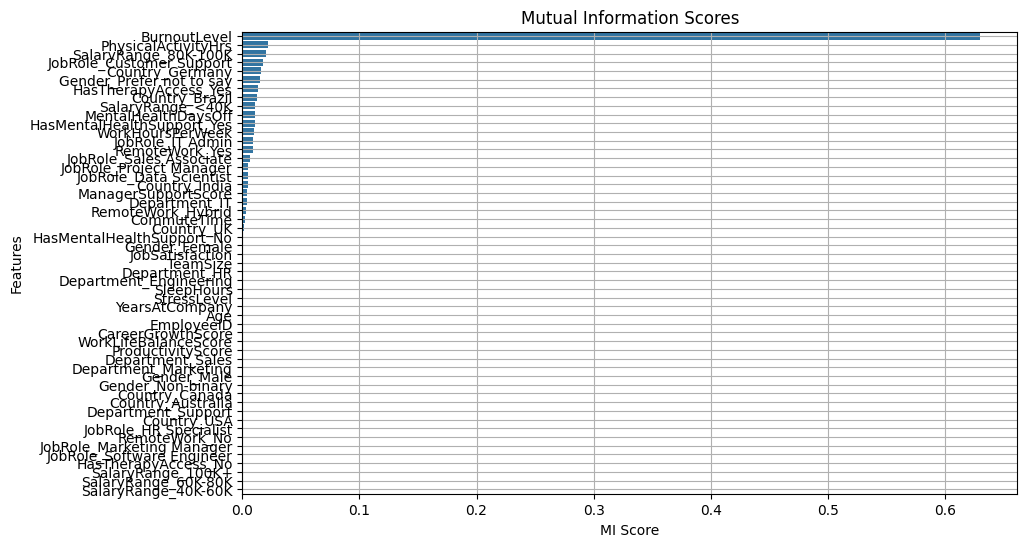

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_df['MI Score'], y=mi_df['Feature'])
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [114]:
important_columns = ['BurnoutLevel', 'Age', 'HasTherapyAccess_No', 'JobRole_Sales Associate', 'Gender_Female', 'Department_HR', 'SalaryRange_80K-100K', 'JobRole_Project Manager', 'JobRole_Software Engineer', 'ManagerSupportScore']
X_New = df_encoded[important_columns]
X_New.head()

,BurnoutLevel,Age,HasTherapyAccess_No,JobRole_Sales Associate,Gender_Female,Department_HR,SalaryRange_80K-100K,JobRole_Project Manager,JobRole_Software Engineer,ManagerSupportScore
0,-0.831171,0.835099,False,True,False,True,False,False,False,-0.882776
1,0.730817,-0.436487,False,False,False,False,True,False,True,-0.401445
2,0.618137,-1.072280,True,False,False,False,True,False,False,-0.697945
3,-0.516442,0.108478,False,False,False,False,False,False,False,-0.362939
4,1.076631,-0.073177,False,False,False,False,False,False,False,0.025976


In [115]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_New, y, test_size=0.3, random_state=52)

In [116]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train_2,y_train_2)
DT_pred_2 = DT.predict(X_test_2)

In [117]:
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train_2,y_train_2)
RF_pred_2 = RF.predict(X_test_2)

In [118]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_2,y_train_2)
KNN_pred_2 = KNN.predict(X_test_2)

In [119]:
print("Before:")
print("(DT)MSE:", mean_squared_error(y_test, DT_pred_1))
print("(DT)R2 Score:", r2_score(y_test, DT_pred_1))
print("-----------------------------------------------------")
print("(RF)MSE:", mean_squared_error(y_test, RF_pred_1))
print("(RF)R2 Score:", r2_score(y_test, RF_pred_1))
print("-----------------------------------------------------")
print("(KNN)MSE:", mean_squared_error(y_test, KNN_pred_1))
print("(KNN)R2 Score:", r2_score(y_test, KNN_pred_1))

Before:
(DT)MSE: 0.00505152556071922
(DT)R2 Score: 0.9948554966160601
-----------------------------------------------------
(RF)MSE: 0.005051525560719286
(RF)R2 Score: 0.9948554966160601
-----------------------------------------------------
(KNN)MSE: 0.5140432410587996
(KNN)R2 Score: 0.47649533565026536


In [120]:
print("After:")
print("(DT)MSE:", mean_squared_error(y_test_2, DT_pred_2))
print("(DT)R2 Score:", r2_score(y_test_2, DT_pred_2))
print("-----------------------------------------------------")
print("(RF)MSE:", mean_squared_error(y_test_2, RF_pred_2))
print("(RF)R2 Score:", r2_score(y_test_2, RF_pred_2))
print("-----------------------------------------------------")
print("(KNN)MSE:", mean_squared_error(y_test_2, KNN_pred_2))
print("(KNN)R2 Score:", r2_score(y_test_2, KNN_pred_2))

After:
(DT)MSE: 0.00505152556071922
(DT)R2 Score: 0.9948554966160601
-----------------------------------------------------
(RF)MSE: 0.005051525560719286
(RF)R2 Score: 0.9948554966160601
-----------------------------------------------------
(KNN)MSE: 0.18488583552232768
(KNN)R2 Score: 0.811711176147796


In [ ]:
# RESULT #
# To become the best model, it need to have low MSE and high R2 Score
# Model comparision
# Before Conditions: taking all columns into consideration while training and testing the data
# After Conditions: selecting the columns by feature selection which may affects the model efficiency and taking those columns for training and testing the model
# K-Nearest Neighbors (KNN)
# KNN relies on distance metrics (e.g., Euclidean), making it highly sensitive to irrelevant or noisy features that distort neighborhood structure.
# Feature selection reduces dimensionality and noise, leading to more accurate neighbor identification and improved predictive performance.
# Decision Tree
# Decision Trees perform intrinsic feature selection by choosing splits based on the most informative features (e.g., using Gini impurity or information gain).
# As a result, removing irrelevant features has minimal impact unless it affects important split variables.
# Random Forest
# Random Forests build multiple Decision Trees on bootstrapped data with random feature subsets, inherently reducing reliance on irrelevant features.
# Due to this ensemble strategy and internal feature sampling, external feature selection yields negligible performance gains.